# Image Processing and Representation

## Section 1: Introduction, Image Formation, Image Representations and Color Spaces

### 1.1 Image Formation: Quantization, Encoding, Decoding, and Storing
In this section, we will explore the basic concepts of how images are formed, captured, and stored. We will discuss the steps of quantization, encoding, and decoding processes, and how images are stored in different formats like JPEG, PNG, etc.

#### How Pictures are Captured
- **Quantization**: Process of converting a continuous range of values into a finite range of discrete values.
- **Encoding**: Transformation of image data into a specific format suitable for storage or transmission.
- **Decoding**: Reversing the encoded format to reconstruct the image.
- **Storing**: Saving the image in specific file formats such as JPEG, PNG, etc.


Image loaded successfully with shape: (512, 512, 3) (Height, Width, Channels)


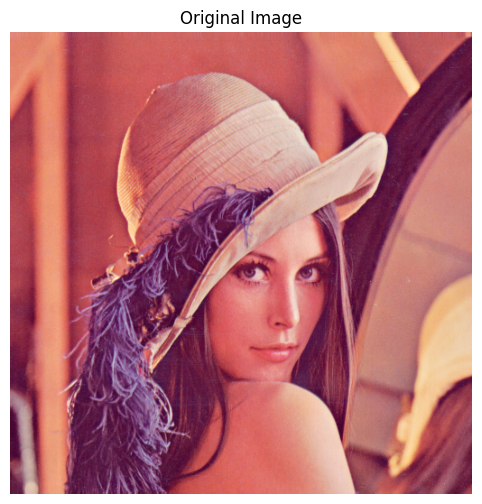

Pixel value at the center (BGR): [ 72  65 180]


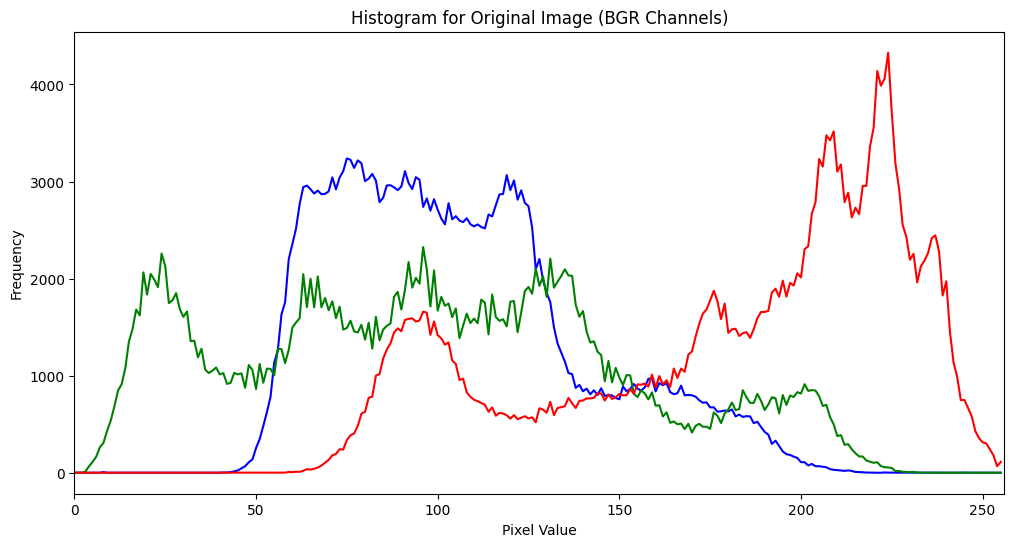

Image saved successfully to encoded_image.png.


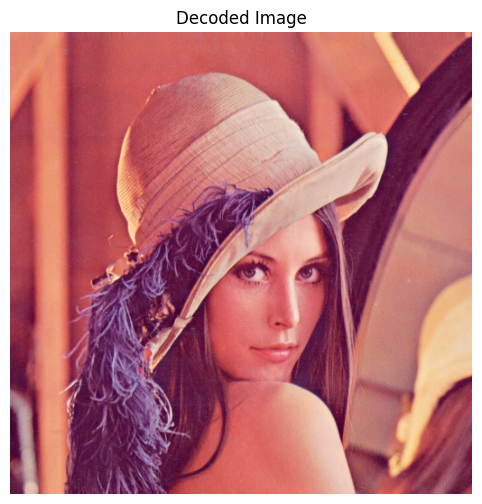

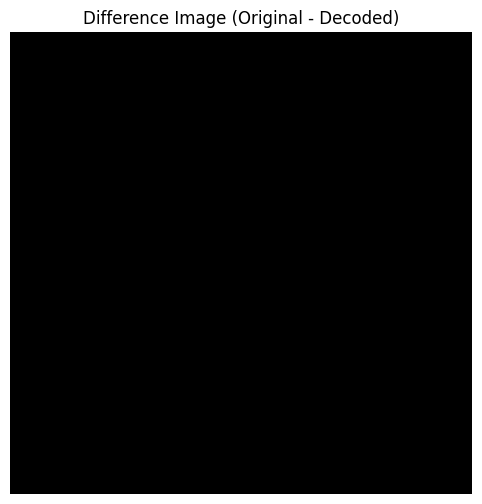

Number of different pixels: 0 out of 786432 total pixels.
Percentage of different pixels: 0.0000%


In [7]:
# Import necessary libraries
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load an image using OpenCV
image_path = 'example_image.png'  # Replace with your image path if using a different image
image = cv2.imread(image_path)

# Check if the image was loaded correctly
if image is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    print(f"Image loaded successfully with shape: {image.shape} (Height, Width, Channels)")

# Display the original image
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Display pixel value information (showing pixel values at the center of the image)
height, width, channels = image.shape
center_pixel = image[height // 2, width // 2]
print(f"Pixel value at the center (BGR): {center_pixel}")

# Plot the histogram of the original image for each channel
colors = ('b', 'g', 'r')
plt.figure(figsize=(12, 6))
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title('Histogram for Original Image (BGR Channels)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Save the image using Pillow (encoding and decoding example)
# Convert the OpenCV image (BGR) to Pillow format (RGB)
pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Save the image as PNG
encoded_image_path = 'encoded_image.png'
pil_image.save(encoded_image_path, 'PNG')
print(f"Image saved successfully to {encoded_image_path}.")

# Load and display the encoded (decoded) image
decoded_image = Image.open(encoded_image_path)
plt.figure(figsize=(8, 6))
plt.imshow(decoded_image)
plt.title('Decoded Image')
plt.axis('off')
plt.show()

# Convert the Pillow image back to OpenCV format for comparison
decoded_image_cv = np.array(decoded_image)
decoded_image_cv = cv2.cvtColor(decoded_image_cv, cv2.COLOR_RGB2BGR)

# Calculate the difference between the original and decoded images
difference = cv2.absdiff(image, decoded_image_cv)

# Display the difference image to visualize changes
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(difference, cv2.COLOR_BGR2RGB))
plt.title('Difference Image (Original - Decoded)')
plt.axis('off')
plt.show()

# Display information about the difference
num_different_pixels = np.sum(difference != 0)
total_pixels = height * width * channels
print(f"Number of different pixels: {num_different_pixels} out of {total_pixels} total pixels.")

# Optional: Display the percentage of different pixels
percentage_different = (num_different_pixels / total_pixels) * 100
print(f"Percentage of different pixels: {percentage_different:.4f}%")



### 1.2 Image Representations and Color Spaces
Different representations and color spaces are used to manipulate images for various tasks such as segmentation, recognition, and analysis. Common color spaces include RGB, HSV, YUV, and others.

#### Color Spaces Overview
- **RGB (Red, Green, Blue)**: Standard color space used in most images and displays.
- **HSV (Hue, Saturation, Value)**: Useful for color-based image segmentation.
- **YUV (Luma, Chroma)**: Used in video compression and broadcast systems.

Image loaded successfully with shape: (512, 512, 3) (Height, Width, Channels)


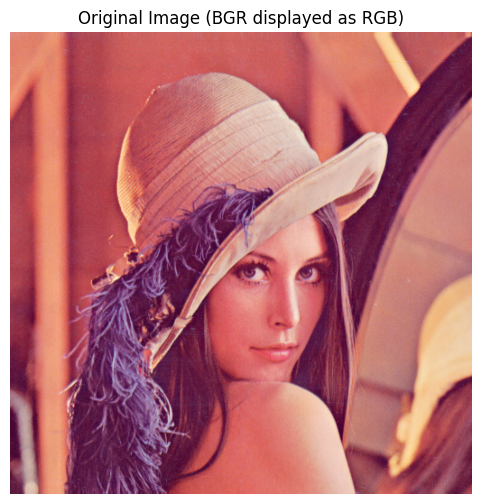

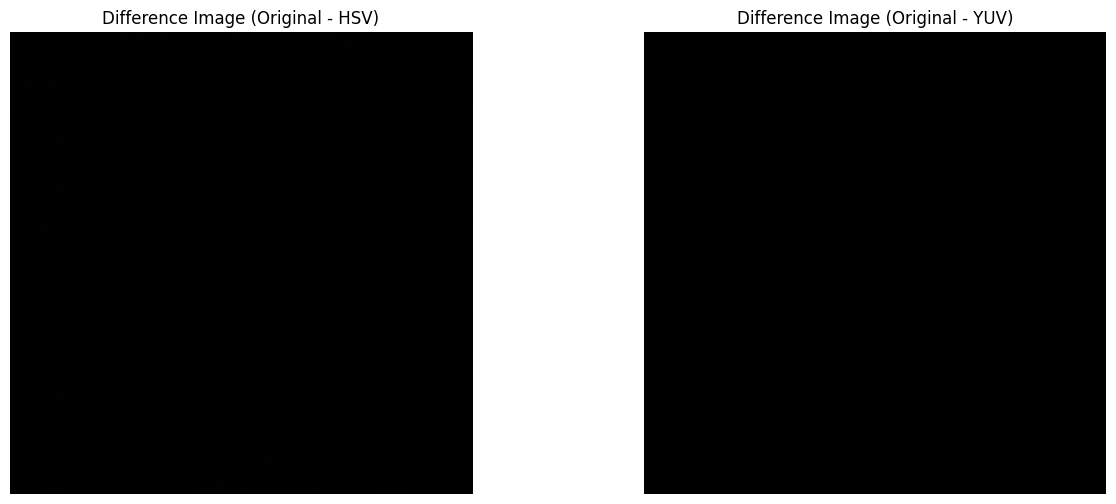

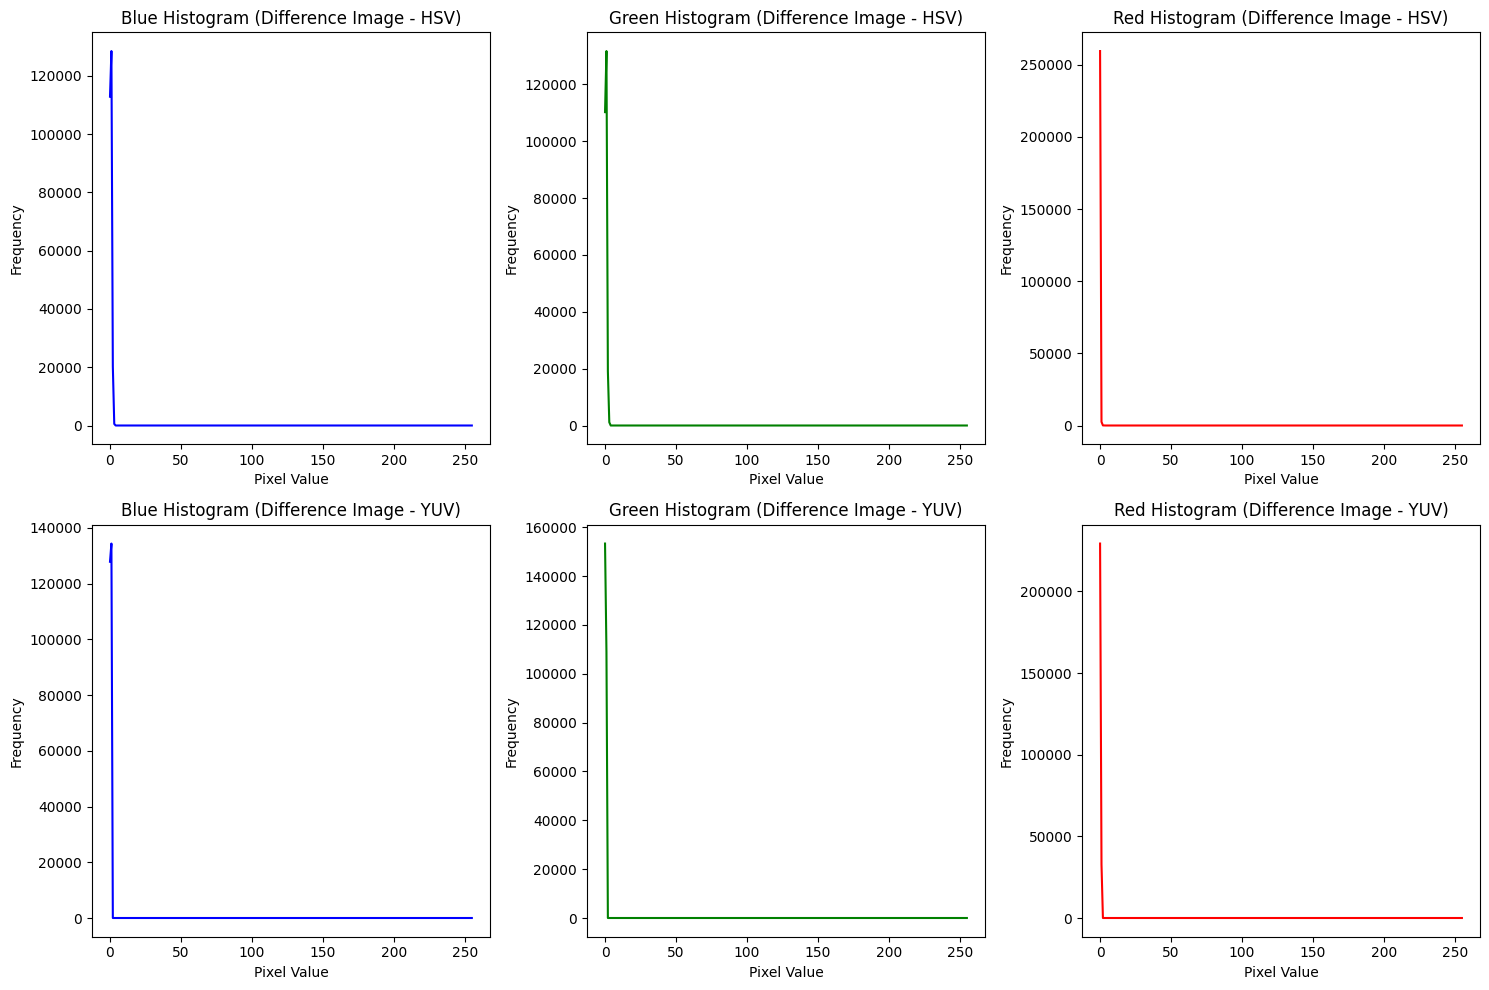

In [10]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image using OpenCV
image_path = 'example_image.png'  # Replace with your image path if using a different image
image = cv2.imread(image_path)

# Check if the image was loaded correctly
if image is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    print(f"Image loaded successfully with shape: {image.shape} (Height, Width, Channels)")

# Display the original BGR image
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image (BGR displayed as RGB)')
plt.axis('off')
plt.show()

# Convert the BGR image to HSV color space
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# Convert the BGR image to YUV color space
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Convert back to BGR from HSV and YUV for comparison
image_hsv_bgr = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)
image_yuv_bgr = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

# Subtract the original image from the converted images
diff_hsv = cv2.absdiff(image, image_hsv_bgr)
diff_yuv = cv2.absdiff(image, image_yuv_bgr)

# Display the differences
plt.figure(figsize=(15, 6))

# Display the difference image between original and HSV-converted image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(diff_hsv, cv2.COLOR_BGR2RGB))
plt.title('Difference Image (Original - HSV)')
plt.axis('off')

# Display the difference image between original and YUV-converted image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(diff_yuv, cv2.COLOR_BGR2RGB))
plt.title('Difference Image (Original - YUV)')
plt.axis('off')

plt.show()

# Visualize histograms for each channel in the difference images
plt.figure(figsize=(15, 10))

# HSV Difference Channel Histograms
for i, color in enumerate(['Blue', 'Green', 'Red']):
    plt.subplot(2, 3, i + 1)
    hist = cv2.calcHist([diff_hsv], [i], None, [256], [0, 256])
    plt.plot(hist, color=color.lower())
    plt.title(f'{color} Histogram (Difference Image - HSV)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

# YUV Difference Channel Histograms
for i, color in enumerate(['Blue', 'Green', 'Red']):
    plt.subplot(2, 3, i + 4)
    hist = cv2.calcHist([diff_yuv], [i], None, [256], [0, 256])
    plt.plot(hist, color=color.lower())
    plt.title(f'{color} Histogram (Difference Image - YUV)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 1.3 Indexed Image Representation

#### Introduction
An indexed image uses a limited set of colors (a colormap) for representing the image. This is useful for reducing the size of the image file while maintaining visual fidelity.

#### Indexed Image Example
We will create an indexed image using a grayscale image and a thresholding technique. This section will also cover visualization of indexed images and colormaps.

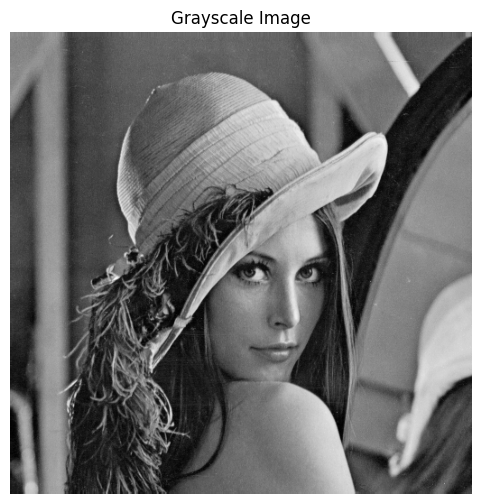

Grayscale Image Shape: (512, 512)
Grayscale Image Pixel Range: 0.06373725490196079 to 0.9450639215686274


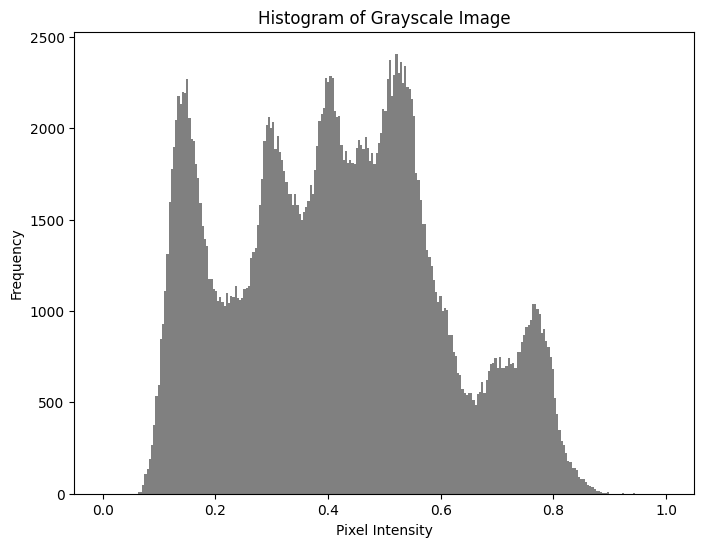

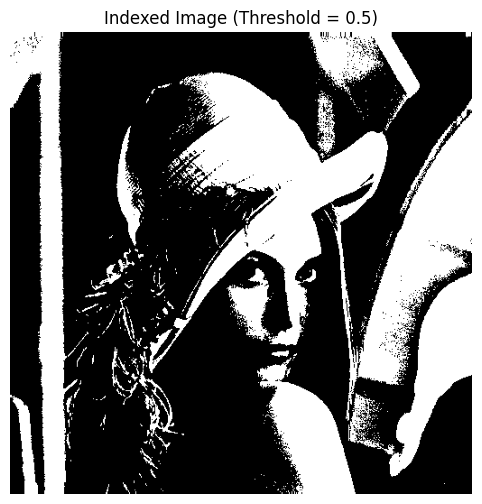

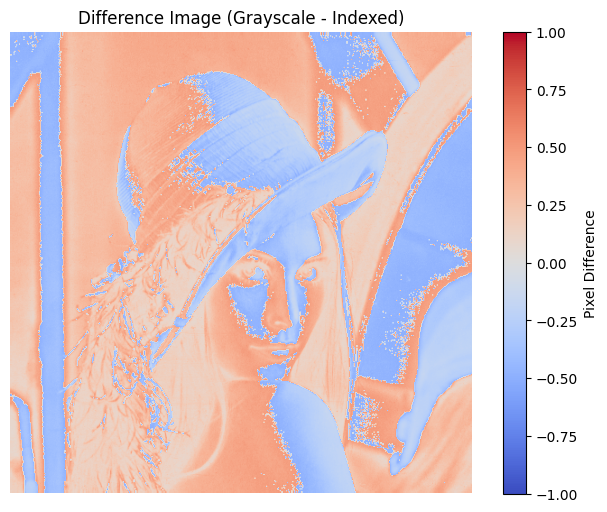

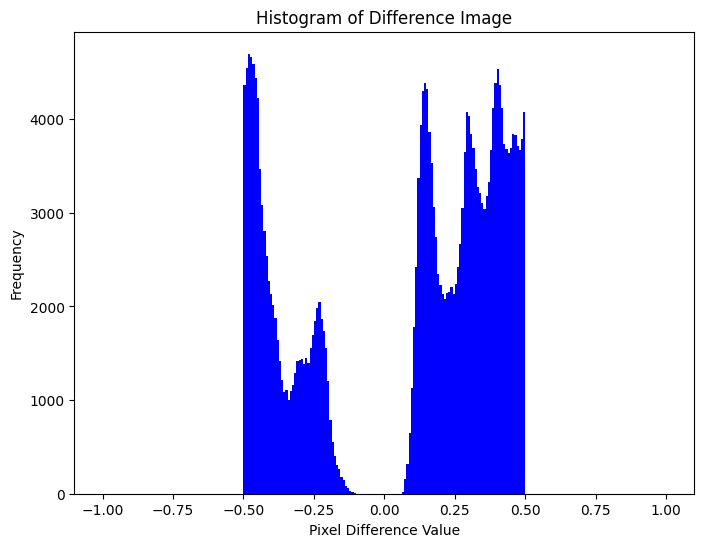

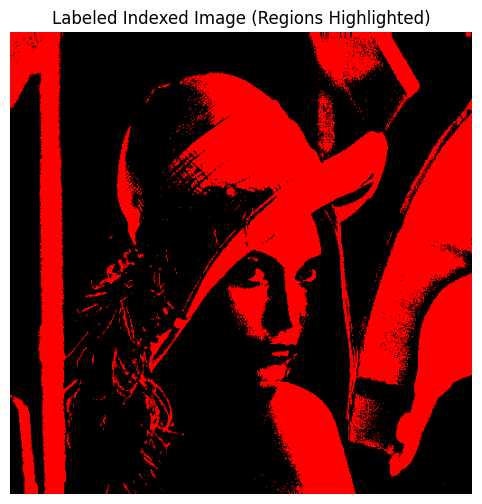

In [11]:
# Import necessary libraries
from skimage import io, color
from skimage.color import rgb2gray, label2rgb
from skimage import img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np

# Assuming `image` is already loaded as in the previous examples
# Convert RGB image to grayscale
gray_image = rgb2gray(image)

# Display the grayscale image
plt.figure(figsize=(8, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Print information about the grayscale image
print(f"Grayscale Image Shape: {gray_image.shape}")
print(f"Grayscale Image Pixel Range: {gray_image.min()} to {gray_image.max()}")

# Visualize the histogram of the grayscale image
plt.figure(figsize=(8, 6))
plt.hist(gray_image.ravel(), bins=256, range=(0, 1), color='gray')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Convert grayscale image to an indexed image using a thresholding method
# Threshold of 0.5 means pixels greater than 0.5 will be white, less than 0.5 will be black
threshold = 0.5
indexed_image = gray_image > threshold

# Display the indexed (binary) image
plt.figure(figsize=(8, 6))
plt.imshow(indexed_image, cmap='gray')
plt.title('Indexed Image (Threshold = 0.5)')
plt.axis('off')
plt.show()

# Visualizing changes in pixel values (difference between original and indexed image)
# Convert boolean to int for visualization purposes
indexed_image_int = indexed_image.astype(int)

# Subtract grayscale image from indexed image to highlight differences
diff_image = gray_image - indexed_image_int

# Display the difference image
plt.figure(figsize=(8, 6))
plt.imshow(diff_image, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Difference Image (Grayscale - Indexed)')
plt.axis('off')
plt.colorbar(label='Pixel Difference')
plt.show()

# Histogram of the difference image to show the distribution of changes
plt.figure(figsize=(8, 6))
plt.hist(diff_image.ravel(), bins=256, range=(-1, 1), color='blue')
plt.title('Histogram of Difference Image')
plt.xlabel('Pixel Difference Value')
plt.ylabel('Frequency')
plt.show()

# Optional: Re-label the binary image to visualize connected components (regions)
labeled_image = label2rgb(indexed_image, bg_label=0)
plt.figure(figsize=(8, 6))
plt.imshow(labeled_image)
plt.title('Labeled Indexed Image (Regions Highlighted)')
plt.axis('off')
plt.show()


### 1.4 K-means Clustering for Image Segmentation

#### Introduction
K-means clustering is a method used for segmenting an image into different regions based on pixel values. It groups similar pixels into clusters, providing an abstract representation of the image.

#### K-means Clustering Example
We will apply K-means clustering to an image to segment it into different clusters. This will demonstrate how the image can be abstracted into meaningful regions.

a:\anaconda3_23.7.3\envs\mitocluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


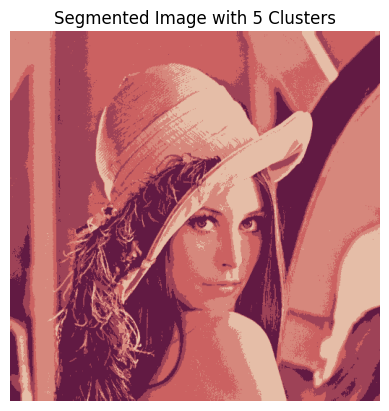

In [5]:
from sklearn.cluster import KMeans

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixels = image.reshape(-1, 3)

# Implement K-means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(pixels)

# Replace each pixel value with its cluster center
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

# Convert the segmented image to integers
segmented_img = segmented_img.astype(np.uint8)

# Display the segmented image
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
plt.title(f'Segmented Image with {n_clusters} Clusters')
plt.axis('off')
plt.show()
